In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [10]:
train = pd.read_csv("train_data.txt", sep=":::", engine="python",header=None, names=["ID","Title","Genre","Description"])
test = pd.read_csv("test_data.txt", sep=":::", engine="python",header=None, names=["ID","Title","Description"])
test_sol =pd.read_csv("test_data_solution.txt", sep=":::", engine="python",header=None, names=["ID","Title","Genre","Description"])


# Data Visualization

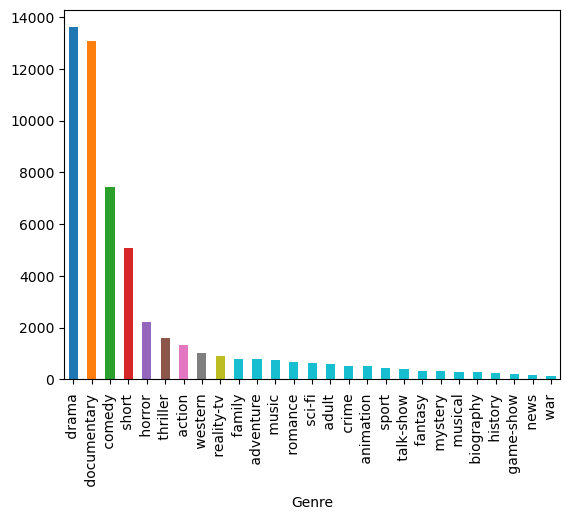

In [11]:
y_train = train["Genre"]
z = y_train.value_counts()
colors = plt.cm.tab10(np.arange(len(z)))
z.plot(kind="bar", color=colors)
plt.show()

# Cleanin of Data

In [12]:
def cleaning(data):
    import re
    clean_txt = re.sub(r'[^a-zA-Z0-9\s]', '', data)
    return clean_txt

In [13]:
train["Description"].apply(cleaning)
test["Description"].apply(cleaning)

0         LR Brane loves his life  his car his apartmen...
1         Spain March 1964 Quico is a very naughty chil...
2         One year in the life of Albin and his family ...
3         His father has died he hasnt spoken with his ...
4         Before he was known internationally as a mart...
                               ...                        
54195     Covering multiple genres Tales of Light  Dark...
54196     As Alice and Cora Munro attempt to find their...
54197     A movie 169 years in the making Oliver Twist ...
54198     Popular but mysterious rock DJ Mike Mallard A...
54199     Curitiba is a city in movement with rhythms a...
Name: Description, Length: 54200, dtype: object

In [14]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train["Description"])
X_test = vectorizer.transform(test["Description"])

In [15]:
print(X_train)

  (0, 13460)	0.11804690971420774
  (0, 80421)	0.16496827666213268
  (0, 104922)	0.1335734870709378
  (0, 20053)	0.09875120854224197
  (0, 9252)	0.17387443262008415
  (0, 33268)	0.18045370345218512
  (0, 24108)	0.1746920144550091
  (0, 83293)	0.1158089030449341
  (0, 40626)	0.07151581998992165
  (0, 76587)	0.022799649354716584
  (0, 22485)	0.09413207237586182
  (0, 40973)	0.09411713170097563
  (0, 63790)	0.0618088147822659
  (0, 62503)	0.04888498414073575
  (0, 4426)	0.12364483677073378
  (0, 19488)	0.1379891209930705
  (0, 118038)	0.14532425412356004
  (0, 51147)	0.12451140674363219
  (0, 118597)	0.16396666927132986
  (0, 84821)	0.10599713006083347
  (0, 36363)	0.10177276094037072
  (0, 37218)	0.16831403148562243
  (0, 48015)	0.09029609103821415
  (0, 113247)	0.1082852616814372
  (0, 6471)	0.1319292432556043
  :	:
  (54199, 39541)	0.11545359376181327
  (54199, 77985)	0.06615170920354208
  (54199, 75594)	0.13939792395601389
  (54199, 74453)	0.06976374450929158
  (54199, 116522)	0.070253

In [16]:
print(X_test)

  (0, 118420)	0.07260088442663354
  (0, 117973)	0.1340686546037148
  (0, 117339)	0.054579223291976536
  (0, 117308)	0.040515186188157
  (0, 114626)	0.69256719870347
  (0, 110313)	0.08135843745204752
  (0, 109500)	0.11558498929746944
  (0, 109228)	0.11483232769203403
  (0, 108650)	0.05874989051921513
  (0, 107522)	0.01751135626220074
  (0, 107499)	0.03085763810309186
  (0, 107461)	0.06124074523749476
  (0, 103128)	0.08244235227419061
  (0, 103030)	0.08276754942218385
  (0, 102906)	0.09750943689945045
  (0, 100411)	0.05732369566543512
  (0, 97874)	0.1652341967250295
  (0, 96883)	0.16748080328005063
  (0, 92478)	0.17004618665040908
  (0, 90182)	0.077460957420874
  (0, 86439)	0.10705668272912537
  (0, 77985)	0.09003555411788164
  (0, 77048)	0.08145177395077563
  (0, 76587)	0.05745873392217888
  (0, 76425)	0.12024282977511888
  :	:
  (54199, 48788)	0.1434200175559623
  (54199, 47180)	0.04989878271625205
  (54199, 44527)	0.07769312931853656
  (54199, 40172)	0.13315974436928146
  (54199, 4007

# Implementation of Naive bayes

In [17]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_test = test_sol["Genre"]
print(classifier.score(X_test, y_test)*100,'%')

44.26568265682656 %


# Implementation of Logistic Regression

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test)*100,'%')

C:\Users\ST\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


59.481549815498155 %


# Implementation of Support Vector Machine (SVM)

In [ ]:
vector = SVC()
vector.fit(X_train, y_train)
print(vector.score(X_test, y_test))